<a href="https://colab.research.google.com/github/allan-gon/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [66]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
small_samp = df.sample(20, random_state=42)
big_samp = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [78]:
print(small_samp['ConvertedSalary'].mean())
print(big_samp['ConvertedSalary'].mean())

55752.2
68551.255


**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

The big sample mean because the likelyhood of having an unlucky sample is decreased because of the larger sample size. Maybe, and that's the problem it shouldn't be ambiguous.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

No

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Confidence interval and margin of error

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



**This one big cell is me redoing the whole notebook how he asked even tho my way worked**

In [77]:
def confidence_interval(data, confidence):
  '''
  data is expected to be array like filled only with numbers
  confidence expects a number as a decimal so 95 would be .95
  '''
  data = np.array(data)
  #samp stdev
  stdev = np.std(data, ddof=1)
  #samp size
  size = len(data)
  #t-stat
  t_stat = stats.t.ppf((1 + confidence) / 2, size -1)
  #mean
  mean = data.mean()
  #standard error
  std_er = stdev / (size)**(1/2)
  #margin of error
  moe = t_stat * std_er
  #confidence interval
  low = mean - moe
  up = mean + moe
  return print(f'lower bound: {low}, upper bound: {up}, mean:{mean},\nmargin of error: +/- {moe}, standard error: {std_er}')

confidence_interval(big_samp['ConvertedSalary'], .95)

lower bound: 60593.058804479086, upper bound: 76509.45119552092, mean:68551.255,
margin of error: +/- 7958.196195520917, standard error: 4035.6853799484325


In [72]:
mean, var, std = stats.bayes_mvs(small_samp['ConvertedSalary'],.95)
sm_conf_int = mean[1]
sm_conf_int

(35805.103096255356, 75699.29690374463)

In [73]:
std_er = stats.sem(small_samp['ConvertedSalary'],ddof = 1 ,nan_policy='omit')
std_er

9530.275995506441

In [74]:
mean1, var1, std1 = stats.bayes_mvs(big_samp['ConvertedSalary'],.95)
big_conf_int = mean1[1]
big_conf_int

(60593.058804479086, 76509.45119552092)

In [75]:
std_er2 = stats.sem(big_samp['ConvertedSalary'],ddof=1 ,nan_policy='omit')
std_er2

4035.6853799484325

**2) Which confidence interval is wider and why?**

The small sample because as the name implies the sample size is smaller and because of this there is less certainty hence the larger possible area that the true parameter can lie in.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

In [76]:
print(mean[0])
#replace 1.96 with 
mar_er = stats.t.ppf((1 + .95) / 2.0, 20 - 1) * std_er
print(mar_er)

55752.2
19947.096903744638


In [79]:
print(mean1[0])
mar_er2 = stats.t.ppf((1 + .95) / 2.0, 200 - 1) * std_er2
print(mar_er2)

68551.255
7958.196195520917


Where the true parameter(average income of bootcamp goers) lies(above or below a ccertain amount of the mean.

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

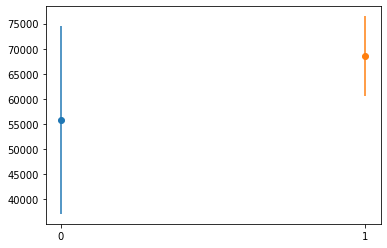

In [62]:
#no clue how to plot conf_int
plt.errorbar(0,mean[0], fmt='o',yerr=mar_er)
plt.errorbar(1, mean1[0], fmt = 'o', yerr=mar_er2)
plt.xticks([0,1])
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

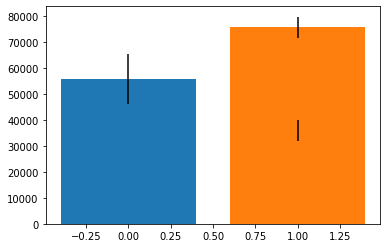

In [61]:
plt.bar(x=0,height=mean[0], yerr=std_er, color=)
plt.bar(x=1,height=mean[1],yerr=std_er2)
plt.xticks([0,1])
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [40]:
tot_mean, tot_var, tot_std = stats.bayes_mvs(df['ConvertedSalary'])
tot_conf_int = tot_mean[1]
tot_conf_int

(71647.1874061198, 75259.62099663282)

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision means in close proximity to eachother where as accuracy means close to the true mean.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

I'm 95% certain that the true average salary of bootcamp grads is between lower bound and upper bound. I think the misconception you were trying to capture is people think that confidence intrvals is how much data is being captured but what it's really saying is there's a 95% chance that the true mean is here, that being said there's a 5% chance i'm wrong due to bad luck when random sampling.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.